In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM



In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving AnomaData.xlsx to AnomaData.xlsx


In [ ]:
import pandas as pd

# Load the dataset (replace 'AnomaData.xlsx' with the exact uploaded file name)
df = pd.read_excel("AnomaData.xlsx")

# Display the first 5 rows
df.head()


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [ ]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check data types and missing values
df.info()


Dataset contains 18398 rows and 62 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16   

In [ ]:
# Summary statistics for numerical columns
df.describe()


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


In [ ]:
# Summary statistics for categorical columns
# Check if there are any object columns before calling describe
if df.select_dtypes(include=['object']).shape[1] > 0:
    display(df.describe(include="object"))
else:
    print("No categorical columns found in the DataFrame.")

No categorical columns found in the DataFrame.


In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Missing values per column:")
print(missing_values)


Missing values per column:
Series([], dtype: int64)


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [ ]:
# Fill missing numerical values with the column mean
df.fillna(df.mean(), inplace=True)

# Fill missing categorical values with mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


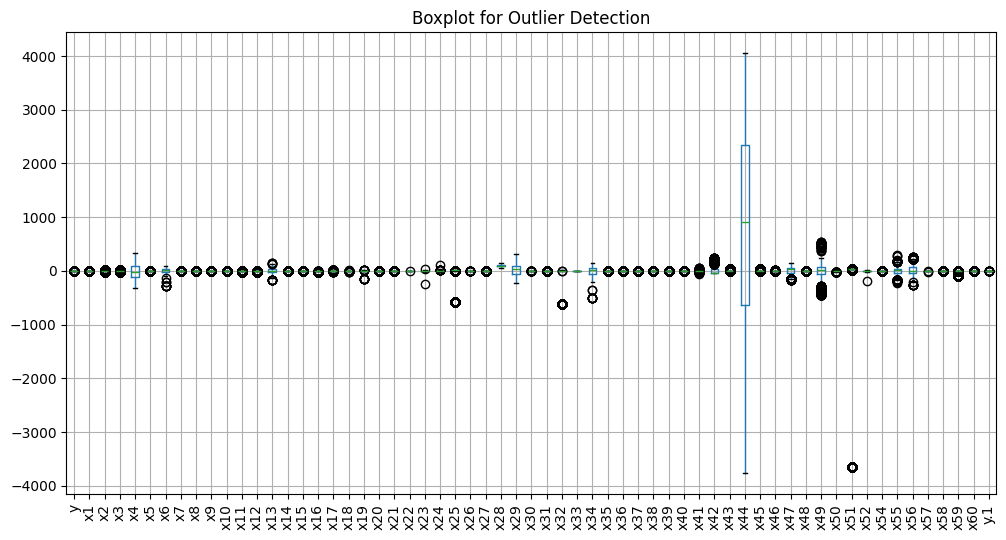

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Plot box plots for numerical features
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


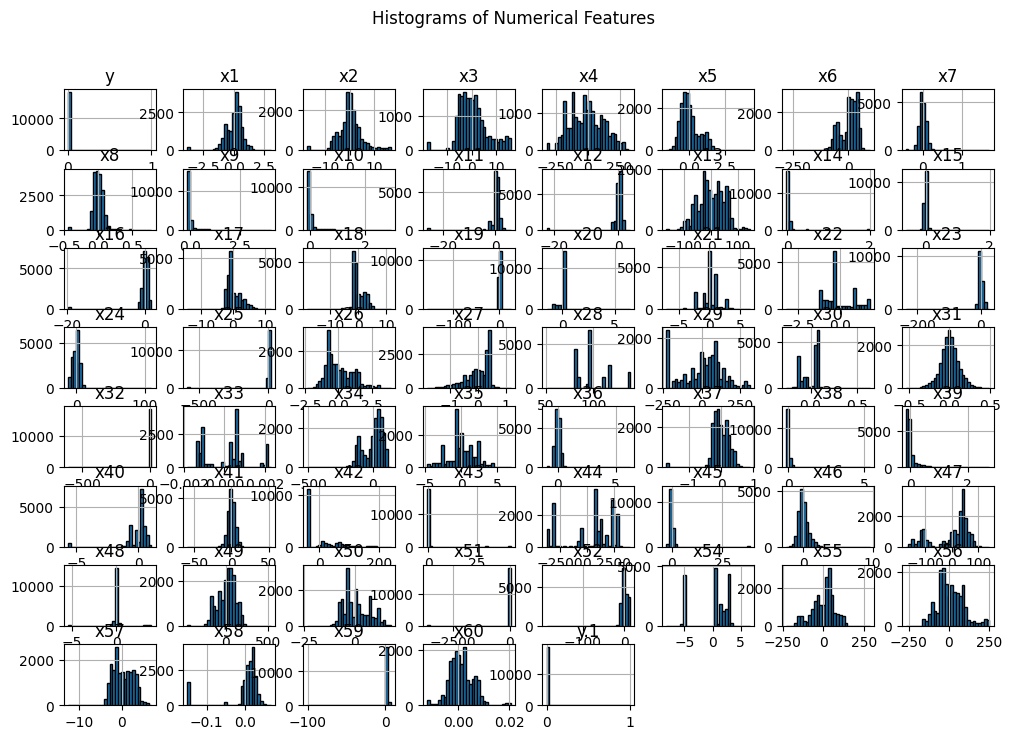

In [ ]:
# Plot histograms
df[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()


In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot bar charts
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()


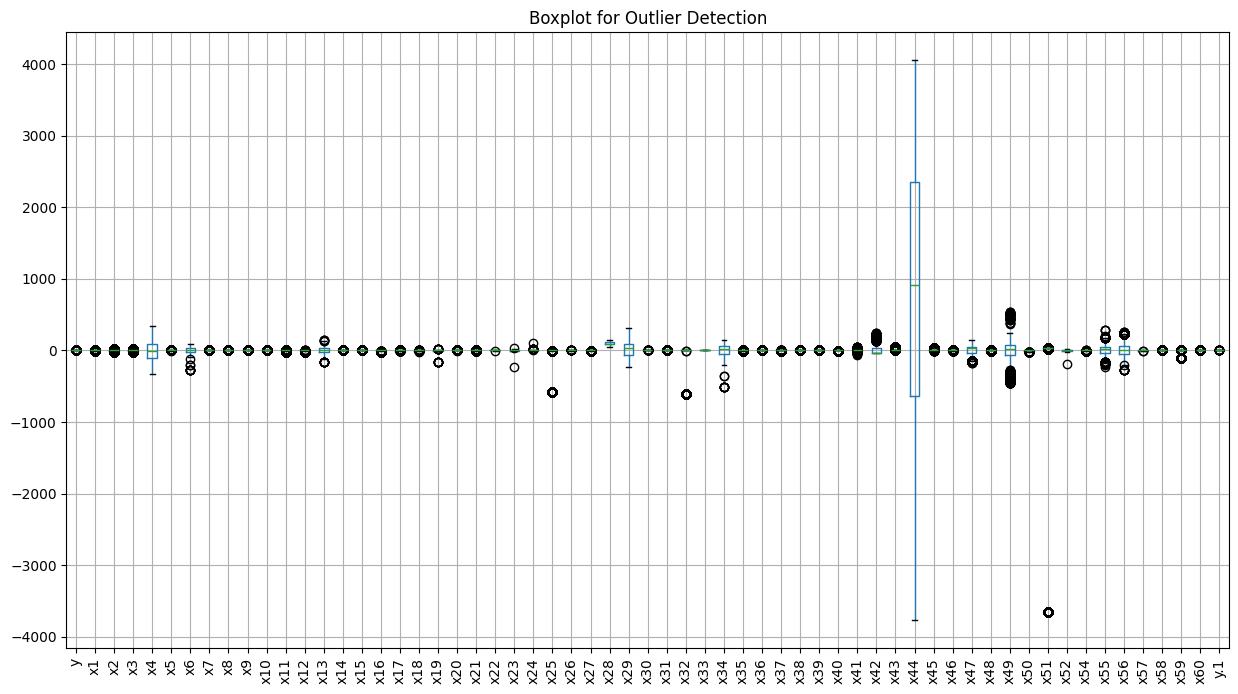

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
numerical_cols = df.select_dtypes(include=['number']).columns

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


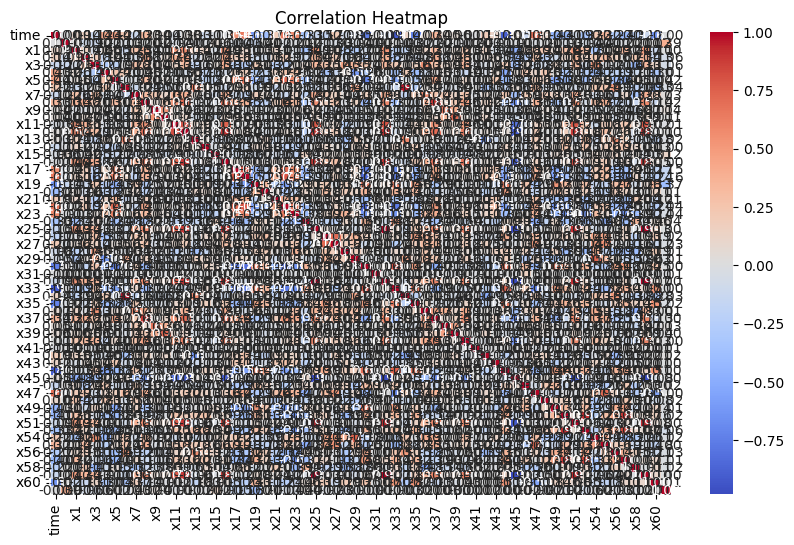

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Replace 'X42' with an actual column name from your DataFrame
column_name = "y"  # Example: Replace "y" with the correct column name
df[column_name].value_counts().head(10)

,count
y,
0,18274
1,124


In [ ]:
# Function to detect outliers using IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


In [ ]:
import numpy as np

# Replace 'column_name' with the actual column name ('y' in this case)
df["y"] = np.log1p(df["y"])  # log1p avoids log(0) errors

In [ ]:
import numpy as np

df["y"] = np.log1p(df["y"])  # log1p avoids log(0) errors


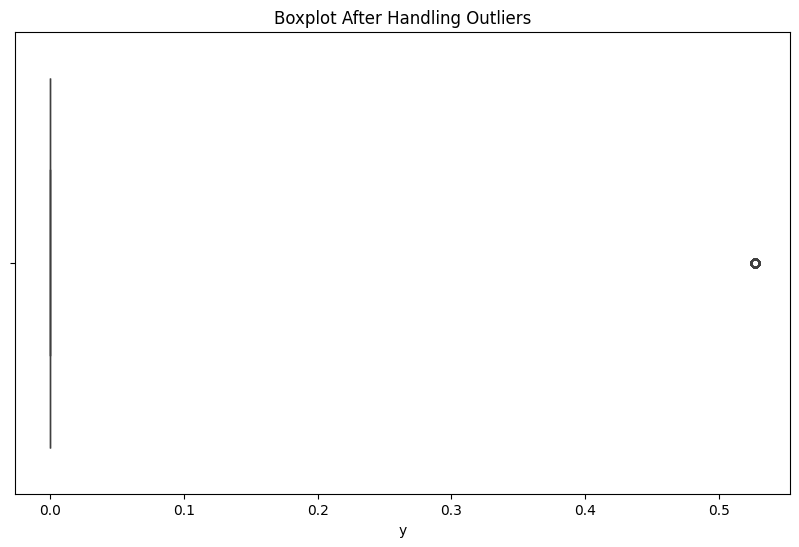

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["y"])
plt.title("Boxplot After Handling Outliers")
plt.show()


In [ ]:
# Check missing values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Show only columns with missing values
print(missing_values)


Series([], dtype: int64)


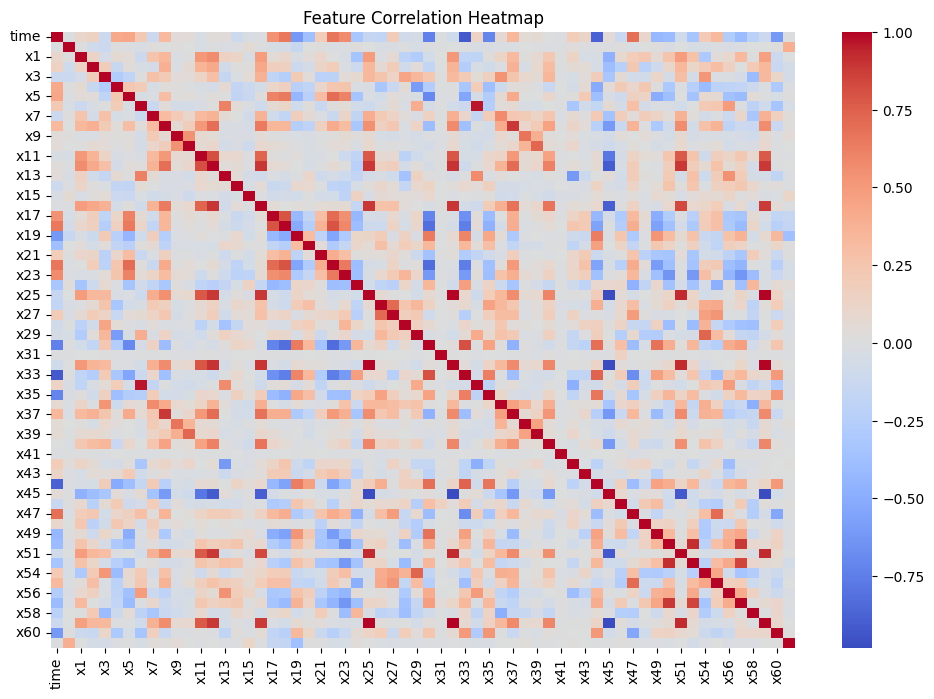

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()

# Fit and transform on numerical features only
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Replace "TargetColumn" with the actual name of your target column
actual_target_column = "y"  # Example: Assuming 'y' is your target column

X = df.drop(actual_target_column, axis=1)
y = df[actual_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify datetime columns
datetime_cols = X_train.select_dtypes(include=['datetime']).columns

# Convert datetime columns to numerical representation (e.g., Unix timestamp)
for col in datetime_cols:
    X_train[col] = X_train[col].astype(np.int64) // 10**9  # Convert to Unix timestamp
    X_test[col] = X_test[col].astype(np.int64) // 10**9   # Apply the same transformation to X_test

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Import Regressor instead of Classifier

# ... (your existing code) ...

model = RandomForestRegressor()  # Change to RandomForestRegressor
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Use appropriate regression metrics like MSE or R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.38
R-squared: 0.57


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f}")


Model RMSE: 0.62


In [ ]:
# Check the target variable (Assume last column is the target)
target_column = df.columns[-1]  # Last column as target
print(f"Target Column: {target_column}")

# Check if the target variable is categorical or continuous
print(df[target_column].dtype)
print(df[target_column].nunique())


Target Column: y.1
float64
2


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['y.1'])  # Remove target column
y = df['y.1']  # Target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (14718, 61)
Test set size: (3680, 61)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# ... (Your previous code for loading and preprocessing data) ...

# Define features (X) and target (y)
X = df.drop(columns=['y.1'])  # Remove target column
y = df['y.1']  # Target variable

# Convert datetime columns to numerical using Unix timestamp
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(np.int64) // 10**9

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform

In [ ]:
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Unique values in y_train: {y_train.unique()}")


y_train shape: (14718,)
y_test shape: (3680,)
Unique values in y_train: [-0.03215258 31.10170075]


In [ ]:
print(type(y_train))  # Should be pandas Series or numpy array
print(type(y_test))   # Should be pandas Series or numpy array


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
import pandas as pd

y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')


In [ ]:
print(df.columns)  # List all available columns


Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')


In [ ]:
y_train = df["y.1"]



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Define the target column
actual_target_column = "y.1"  # Ensure 'y.1' exists in df.columns

# Split features (X) and target (y)
X = df.drop(columns=[actual_target_column])
y = df[actual_target_column]

# Convert datetime columns to numerical using Unix timestamp
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(np.int64) // 10**9

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model trained successfully 🎯
print("✅ Model trained successfully!")

✅ Model trained successfully!


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🔹 R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better


🔹 R² Score: 0.4043
🔹 Mean Absolute Error (MAE): 0.2350


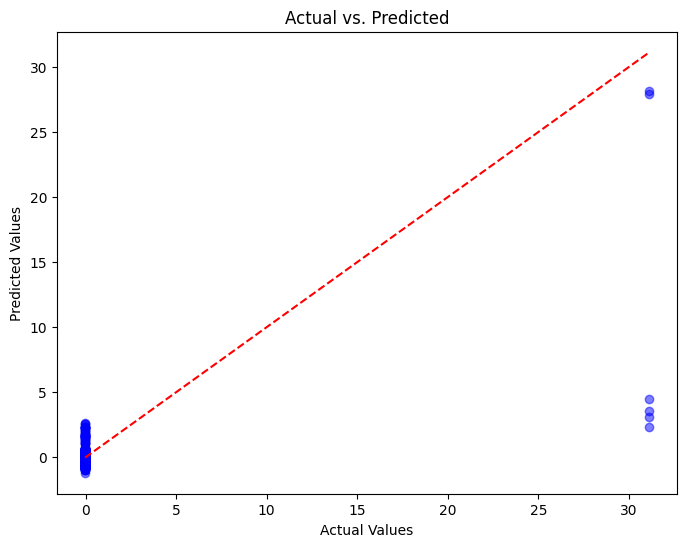

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🔹 R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better


🔹 R² Score: 0.4043
🔹 Mean Absolute Error (MAE): 0.2350


In [ ]:
import pandas as pd
importance = pd.Series(lin_reg.coef_, index=X_train.columns).sort_values(ascending=False)
print(importance)


x25    3.117313
x34    0.515047
x44    0.257725
x42    0.204659
y      0.183209
         ...   
x59   -0.397286
x6    -0.460076
x18   -0.482942
x19   -0.686782
x32   -2.678482
Length: 61, dtype: float64


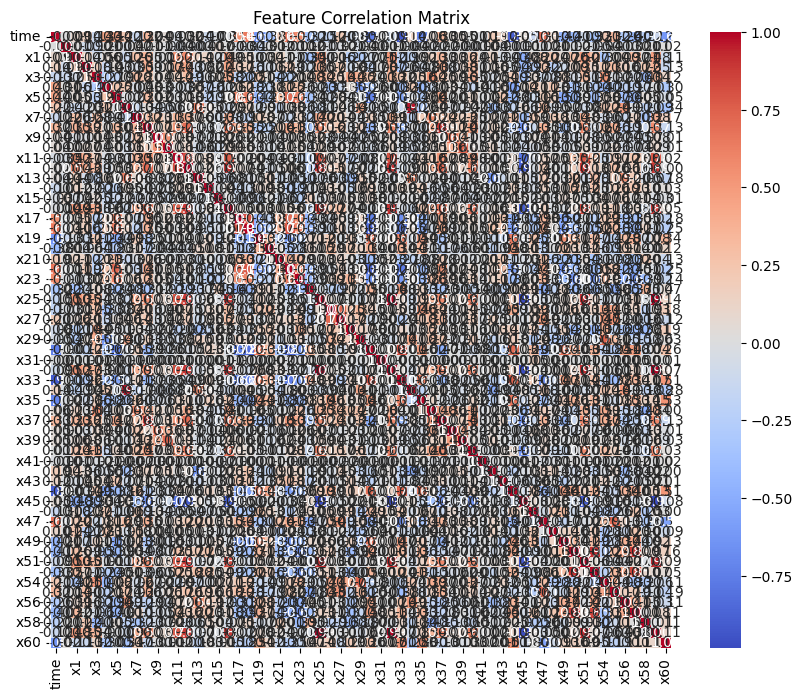

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"🔹 Random Forest R² Score: {r2_rf:.4f}")


🔹 Random Forest R² Score: 0.9419


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"🔹 XGBoost R² Score: {r2_xgb:.4f}")


🔹 XGBoost R² Score: 1.0000


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file


Saving AnomaData.xlsx to AnomaData (1).xlsx


In [ ]:
import pandas as pd

# Load the dataset (update the file path if needed)
df = pd.read_excel("AnomaData.xlsx")

# Check the first few rows
df.head()


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define Target Variable
actual_target_column = "y.1"  # Change this if needed

# Split Features and Target
X = df.drop(columns=[actual_target_column])
y = df[actual_target_column]

# Convert datetime columns to numerical using Unix timestamp
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(np.int64) // 10**9

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = lin_reg.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"📊 R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.4f}")


📊 R² Score: 0.4043
📉 Mean Absolute Error (MAE): 0.0075
📈 Root Mean Squared Error (RMSE): 0.0311


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature Scaling Completed!")


✅ Feature Scaling Completed!


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model performance
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"✅ Random Forest Model Trained! \nR² Score: {r2_rf:.4f} \nMAE: {mae_rf:.4f}")


✅ Random Forest Model Trained! 
R² Score: 0.9549 
MAE: 0.0001


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearch
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit GridSearch
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best params
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_best_rf = best_rf.predict(X_test_scaled)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f"✅ Optimized Random Forest Model \nR² Score: {r2_best_rf:.4f} \nMAE: {mae_best_rf:.4f}")


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
✅ Optimized Random Forest Model 
R² Score: 0.9549 
MAE: 0.0001


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file


Saving AnomaData.xlsx to AnomaData.xlsx


In [ ]:
import os
print(os.listdir())  # This should display your uploaded file


['.config', 'AnomaData.xlsx', 'drive', 'sample_data']


In [ ]:
import pandas as pd
df = pd.read_excel("AnomaData.xlsx")
df.head()  # Display the first few rows


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [ ]:
import os

if "AnomaData.xlsx" in os.listdir():
    print("✅ File uploaded successfully!")
else:
    print("❌ File upload failed. Try again.")


✅ File uploaded successfully!


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("AnomaData.xlsx")

# Display basic info
print(df.info())
print(df.head())  # Show the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [ ]:
df = df.dropna()  # Remove missing values


In [ ]:
target_column = "y.1"  # Update if needed
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]  # Target


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split successfully!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


✅ Data split successfully!
Training set: (14718, 61), Test set: (3680, 61)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_excel("AnomaData.xlsx")

# Drop rows with missing values
df = df.dropna()

# Define target column
target_column = "y.1"

# Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert datetime columns to numerical (Unix timestamp)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(np.int64) // 10**9

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [ ]:
for col in X.select_dtypes(include=['datetime64']).columns:
       X[col] = X[col].astype(np.int64) // 10**9

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:\nMSE: {mse:.4f}\nR² Score: {r2:.4f}")


📊 Model Evaluation:
MSE: 0.0010
R² Score: 0.4043


In [ ]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as 'model.pkl'!")


✅ Model saved as 'model.pkl'!


In [ ]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open("model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Model loaded successfully!")

# Make predictions
new_predictions = loaded_model.predict(X_test[:5])
print("🔍 Predictions on new data:", new_predictions)


✅ Model loaded successfully!
🔍 Predictions on new data: [ 0.01929687 -0.00047955 -0.00285403  0.00375098 -0.00661943]
